In [1]:
import os
import cv2
import glob
import torch
from skimage import io
from torchvision import utils as utl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils.dataLoader import build_dataset

In [3]:
train_folder = './dataset/CIFAR_10/train/' 
test_folder  = './dataset/CIFAR_10/test/'

In [4]:
build_data_loader = build_dataset(output_size=36, batch_size=8, img_folder=train_folder)
train_dataloader  = build_data_loader.train(train_folder, 360)
test_dataloader   = build_data_loader.test(test_folder)

In [5]:
def show_batch_imgs(sample_batched, one_hot_to_label_dict=build_data_loader.one_hot_to_label_dict()):
    """Show image with landmarks for a batch of samples."""
    images_batch, label_batch = sample_batched['image'], sample_batched['label']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2
    grid = utl.make_grid(images_batch)
    
    title=''
    for i in range(batch_size):
        title += (f'{i+1}   '+str(one_hot_to_label_dict[str(label_batch[i].tolist())])+'\n')
    
    plt.figure(figsize=(15,3))
    plt.title(title, loc='left', fontsize=16)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

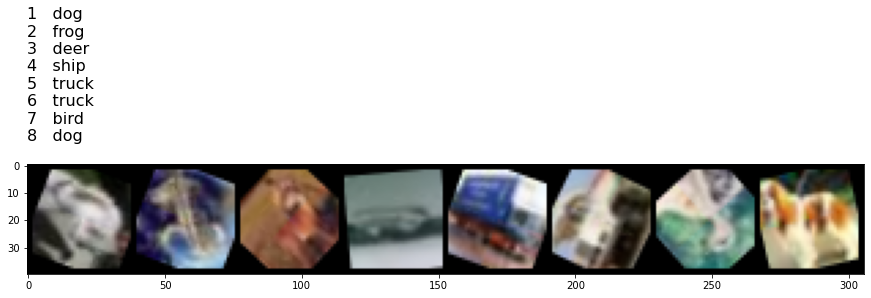

In [9]:
for i_batch, sample_batched in enumerate(train_dataloader):
    show_batch_imgs(sample_batched)
    if i_batch == 0:
        break